## Random Walk Model

The code implementation of a **random walk model in a square lattice (2D)**.

- The walker starts at the origin (0,0) and moves randomly in the lattice.
- The walker can move in four directions: up, down, left, right. *All with equal probability*.
- The walker can move only one step at a time.

### Creating the random movements

1. We will create a class that contains the possible movements of the walker. We will implement a method that returns a random movement.
2. Create a series of **m** random walks, each consisting of **n** steps.

In [368]:
m = 3000 # Number of random walks to simulate
n = 1000 # Number of steps in each random walk
a = 1 # Lattice spacing

In [369]:
from enum import Enum
import random

# The class that contains the possible directions
class Direction(Enum):
    UP = [0, 1]
    DOWN = [0, -1]
    LEFT = [-1, 0]
    RIGHT = [1, 0]

    def random_choice(n: int = 1):
        return random.choices(list(Direction), k=n)

# Test that the random choice works, run this cell 
# multiple times and see the result change
Direction.random_choice()

[<Direction.DOWN: [0, -1]>]

In [370]:
random_walks = [] # List of random walks
for _ in range(m):
    random_walk = Direction.random_choice(n) # List of steps in a random walk
    random_walks.append(random_walk)

# Show the first 5 steps of the first random walk
random_walks[0][:5]

[<Direction.RIGHT: [1, 0]>,
 <Direction.UP: [0, 1]>,
 <Direction.RIGHT: [1, 0]>,
 <Direction.RIGHT: [1, 0]>,
 <Direction.UP: [0, 1]>]

### Calculating the distance from the origin

Now that we have the random walks we can calculate the vector from the origin at each step ($R_n$, n is the step number).

In [371]:
v_Rn = [] # List of vectors from origin for each step for each random walk
for random_walk in random_walks:
    random_walk_Rn = [random_walk[0].value] # Vector from origin for each step in the random walk
    
    for step in random_walk[1:]:
        last_Rn = random_walk_Rn[-1]
        new_Rn = [last_Rn[0] + step.value[0], last_Rn[1] + step.value[1]]
        random_walk_Rn.append(new_Rn)

    v_Rn.append(random_walk_Rn)

# Show the first 5 steps of the first random walk
v_Rn[0][:5]

[[1, 0], [1, 1], [2, 1], [3, 1], [3, 2]]

The distance squared from the origin is the magnitude of the vector $R_n^2$.

In [372]:
Rn2 = [] # List of distances squared from origin for each step for each random walk
for vectors in v_Rn:
    distances = []

    for vector in vectors:
        distance = ((vector[0]*a)**2 + (vector[1]*a)**2)
        distances.append(distance)

    Rn2.append(distances)

# Show the first 5 steps of the first random walk
Rn2[0][:5]

[1, 2, 5, 10, 13]

We can plot one of the squared distances from the origin as a function of the step number **n**.

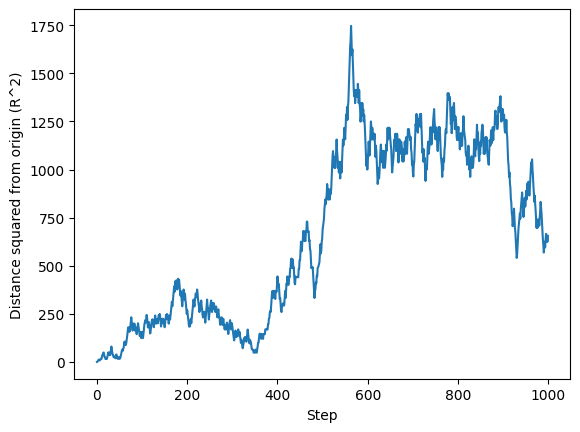

In [373]:
import matplotlib.pyplot as plt

x = list(range(n)) # List of steps
y = Rn2[0] # List of distances squared from origin for each step in the first random walk
           # Feel free to change the index to see other random walks

plt.plot(x, y)
plt.xlabel('Step')
plt.ylabel('Distance squared from origin (R^2)')
plt.show()

Now we can calculate the mean squared distance from the origin for each step (**n**).

In [374]:
mean_Rn2 = [] # List of mean distances squared from origin for each step
for i in range(n):
    sum_Rn2 = 0
    for j in range(m):
        sum_Rn2 += Rn2[j][i]

    mean_Rn2.append(sum_Rn2/m)

# Show the first 5 steps
mean_Rn2[:5]

[1.0, 2.0406666666666666, 3.018666666666667, 3.9766666666666666, 5.028]

Now if we plot the mean squared distance from the origin as a function of the step number **n** we can see that it grows linearly with **n** (As long as **m** is sufficiently large, to average out the random movements).

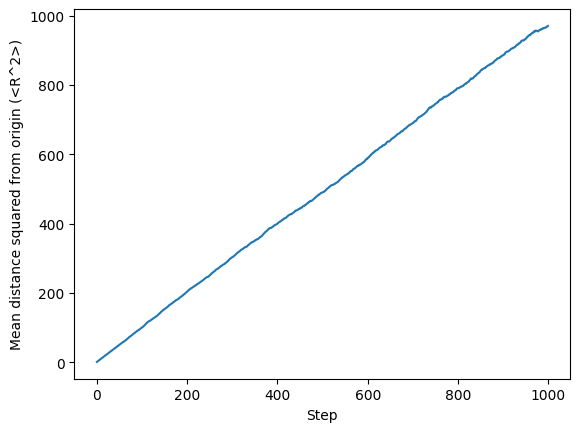

In [375]:
x = list(range(n)) # List of steps
y = mean_Rn2 # List of mean distances squared from origin for each step

plt.plot(x, y)
plt.xlabel('Step')
plt.ylabel('Mean distance squared from origin (<R^2>)')
plt.show()

As we can see the mean squared distance from the origin is proportional to the number of steps taken.

The exact realtion is given by: $<R_n^2> = na^2$.

### End-to-end probability distribution

We can also calculate the probability distribution of the end-to-end distance of the random walk.

To do this we will have to create bins of the end-to-end distance and count the number of times the walker ends up in each bin.

We can also plot the analytical solution for the probability distribution of the end-to-end distance of the random walk:

$$P(R_n) = (\frac{3}{2\pi n a^2})^{3/2} 4\pi R_n^2 exp(-\frac{3 R_n^2}{2 n a^2})$$

In [376]:
nbins = 30 # Number of bins
# We will only plot the probability distribution for the last step
# Feel free to change the index to see other steps
plot_step = n-1

In [377]:
def create_range(
    start: float = 0.1, end: float = 3.0, items: int = 30
) -> list[float]:
    """Return a float range between 'start' and 'end'"""
    # Check end is bigger than start
    if start >= end:
        raise ValueError("start value is bigger than end value")
    
    # Check that items is bigger than 1
    if items <= 1:
        raise ValueError("items value must be bigger than 1")

    step_val = (end - start) / (items - 1)
    range_vals = []
    for i in range(items):
        range_vals.append(start + step_val*i)

    return range_vals

Minimum R: 0.0
Maximum R: 87.72684879784524
Bin width: 2.924228293261508
Error: 0.021040656598440306
r^2: 0.9999999954366111


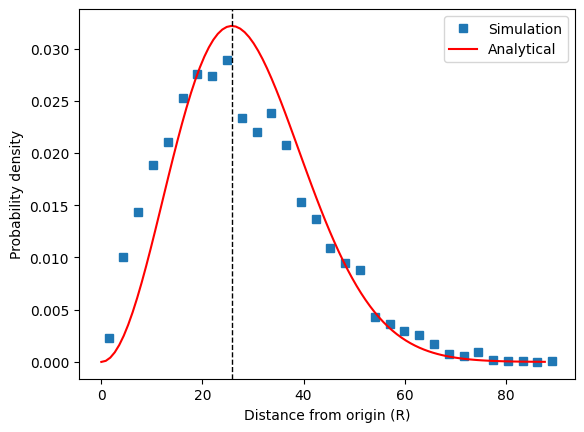

In [378]:
import math

Rn_vals = [math.sqrt(Rn2[i][plot_step]) for i in range(m)] # List of distances from origin for the last step in each random walk

# Calculate the min and max values
min_Rn = min(Rn_vals)
max_Rn = max(Rn_vals)
print(f'Minimum R: {min_Rn}')
print(f'Maximum R: {max_Rn}')

# Calculate the bin width
bin_width = (max_Rn - min_Rn)/nbins
print(f'Bin width: {bin_width}')

# Count the number of values in each bin
bins = [0 for _ in range(nbins+1)]
for Rn_val in Rn_vals:
    bin_index = 0
    for i in range(nbins):
        if Rn_val >= min_Rn + i*bin_width and Rn_val < min_Rn + (i+1)*bin_width:
            break
        bin_index += 1

    bins[bin_index] += 1

# Calculate the bin centres
bin_centres = [min_Rn + bin_width*(i+0.5) for i in range(nbins+1)]

# Normalise the bins
bin_heights = [bin_val/(m*bin_width) for bin_val in bins]

# calculate the analytical probability distribution

analytical_x = create_range(start=min_Rn, end=max_Rn, items=100)
analytical_y = []
for R in analytical_x:
    try:
        analytical_y.append(math.pow(3/(2*math.pi*plot_step*(a**2)), 1.5)*
                            math.exp(-3*math.pow(R,2.0)/(2*plot_step*(a**2)))*4*math.pi*math.pow(R,2.0))
    except ZeroDivisionError:
        analytical_y.append(None)

# Plot the probability distribution
plt.plot(bin_centres, bin_heights, 's', label='Simulation')
plt.plot(analytical_x, analytical_y, color='red', label='Analytical')
plt.axvline(math.sqrt(2*plot_step/3)*a, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Distance from origin (R)')
plt.ylabel('Probability density')
plt.legend()
plt.show()